# Machine Learning Specialization Course 1 Practice

### Supervised Learning
1. Lienar Regression Algorithm
2. Polynomial Regression Algorithm
3. Logistic Regression Algorithm

### Things to consider
- Single or multiple features?
- Methods of feature scaling
- Regularization


Throughout this investigation, I will use the "honey_purity_dataset.csv" file to observe the effects of different features on the price of honey using the linear regression algorithm. 


In [24]:
import numpy as np
import copy
import pandas as pd
import math
import matplotlib.pyplot as plt


Firstly, I will proceed to import and observe the data


In [3]:
data = pd.read_csv("honey_purity_dataset.csv")
print(type(data))
data.head

<class 'pandas.core.frame.DataFrame'>


<bound method NDFrame.head of           CS  Density     WC    pH    EC      F      G Pollen_analysis  \
0       2.81     1.75  23.04  6.29  0.76  39.02  33.63       Blueberry   
1       9.47     1.82  17.50  7.20  0.71  38.15  34.41         Alfalfa   
2       4.61     1.84  23.72  7.31  0.80  27.47  34.36        Chestnut   
3       1.77     1.40  16.61  4.01  0.78  31.52  28.15       Blueberry   
4       6.11     1.25  19.63  4.82  0.90  29.65  42.52         Alfalfa   
...      ...      ...    ...   ...   ...    ...    ...             ...   
247898  1.98     1.29  17.90  4.82  0.89  36.10  34.69        Rosemary   
247899  6.18     1.67  19.54  4.91  0.85  31.15  20.82          Acacia   
247900  7.78     1.49  15.78  5.69  0.73  44.60  44.07        Chestnut   
247901  5.78     1.74  14.96  6.81  0.83  47.19  37.79         Avocado   
247902  8.96     1.86  18.62  6.89  0.86  25.94  42.88        Lavender   

        Viscosity  Purity   Price  
0         4844.50    0.68  645.24  
1        


It can be observed by the **.head** method that the **honey_purity_dataset.csv** file consists of 247,903 samples each with 11 features. The features are outlined as follows:
   - CS(Color Score)
   - Density
   - WC(Water Content)
   - pH
   - EC(Electrical Conductivity)
   - F(Fructose Level)
   - G(Glucose Level)
   - Pollen_analysis
   - Viscosity
   - Purity
   - Price


I have hypothized that purity will have the greatest effect on the price of honey. Hence our first investigation:

## Purity vs Price of honey


In [4]:
x_train = data["Purity"].to_numpy()
y_train = data["Price"].to_numpy()

#The number of training examples m
m = len(x_train)
print(f"The number of training examples in the dataset is: {m}")

The number of training examples in the dataset is: 247903


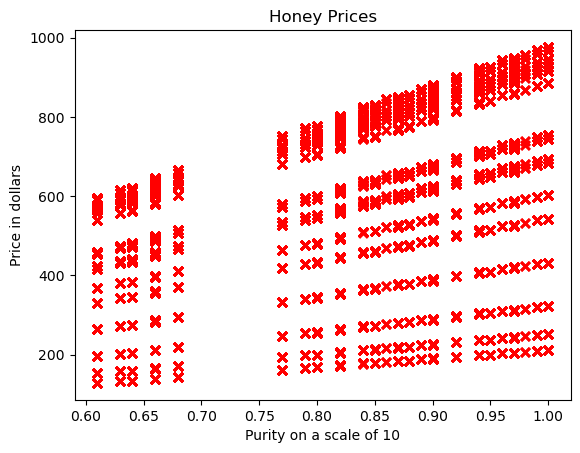

In [5]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Honey Prices")
# Set the y-axis label
plt.ylabel('Price in dollars')
# Set the x-axis label
plt.xlabel('Purity on a scale of 10')
plt.show()

It can be seen that there are just too many data points that make the graph hard to interpret. Hence it may be helpful to randomly reduce the number of samples. 

In [6]:
sampled_data = data.sample(n=100)
sampled_data.head

<bound method NDFrame.head of           CS  Density     WC    pH    EC      F      G Pollen_analysis  \
128219  5.66     1.34  18.06  5.30  0.81  35.74  35.36            Sage   
117297  8.35     1.63  14.03  2.82  0.86  40.93  43.89          Clover   
108742  5.45     1.55  19.94  3.06  0.82  43.94  36.43      Wildflower   
59534   3.67     1.49  16.34  6.30  0.78  41.97  26.57         Alfalfa   
133971  7.77     1.63  14.92  3.66  0.71  46.21  37.53         Alfalfa   
...      ...      ...    ...   ...   ...    ...    ...             ...   
98254   2.32     1.42  17.15  5.91  0.72  28.15  42.89           Thyme   
138987  6.78     1.46  22.06  5.57  0.86  26.36  27.38      Wildflower   
24599   6.78     1.40  17.51  7.47  0.81  31.47  40.67           Thyme   
157441  1.44     1.79  23.16  6.68  0.82  41.69  40.03      Wildflower   
145388  4.73     1.53  14.51  5.91  0.81  27.91  35.71          Tupelo   

        Viscosity  Purity   Price  
128219    5430.46    1.00  926.30  
117297   


The reason for taking randomly selected rows from data instead of x_train and y_train separately is because we need the training examples in pairs (x_train, y_train).


In [34]:
x_sample_train = sampled_data["Purity"].to_numpy()
y_sample_train = sampled_data["Price"].to_numpy()

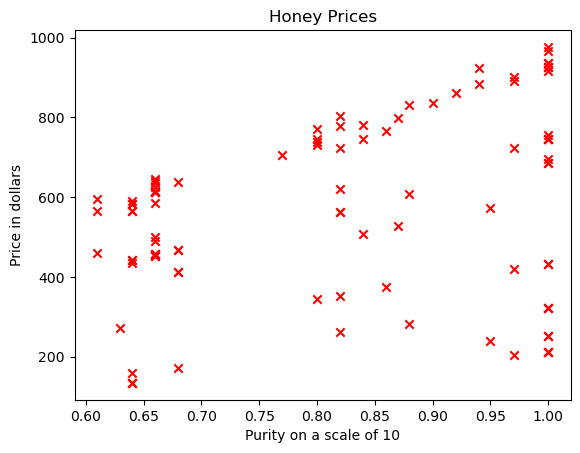

In [35]:
# Plot the sampled data points
plt.scatter(x_sample_train, y_sample_train, marker='x', c='r')
# Set the title
plt.title("Honey Prices")
# Set the y-axis label
plt.ylabel('Price in dollars')
# Set the x-axis label
plt.xlabel('Purity on a scale of 10')
plt.show()

Let's move on to create a line of best fit for the graph using linear regression and gradient descent.

## Model function

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b $$

let's randomly select random values for w and b to begin with.

In [41]:
w = 300
b = 100

In [38]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

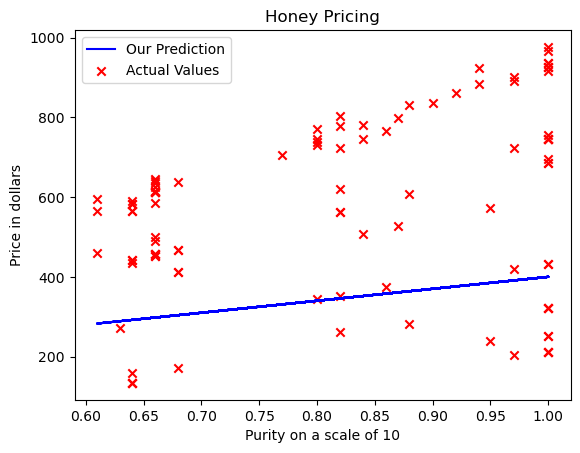

In [42]:
tmp_f_wb = compute_model_output(x_sample_train, w, b,)

# Plot our model prediction
plt.plot(x_sample_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_sample_train, y_sample_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Honey Pricing")
# Set the y-axis label
plt.ylabel('Price in dollars')
# Set the x-axis label
plt.xlabel('Purity on a scale of 10')
plt.legend()
plt.show()

Although we were able to fit a linear line on the graph, it doesn't seem to be a great fit. It seems implausible to try every combination of w and b parameters manually. Hence we will use the cost function along with gradient descent to achieve the best values of w and b. 

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$
  
It is in our best interest to choose a set of parameters w and b that minimizes the cost.

In [43]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

*gradient descent* is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [44]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [45]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [58]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 8.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_sample_train ,y_sample_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.48e+05  dj_dw: -4.792e+02, dj_db: -5.734e+02   w:  3.834e+01, b: 4.58696e+01
Iteration 1000: Cost 2.29e+04  dj_dw: -8.093e-01, dj_db:  6.710e-01   w:  3.977e+02, b: 2.48528e+02
Iteration 2000: Cost 2.29e+04  dj_dw: -2.878e-01, dj_db:  2.386e-01   w:  4.381e+02, b: 2.15091e+02
Iteration 3000: Cost 2.29e+04  dj_dw: -1.023e-01, dj_db:  8.484e-02   w:  4.524e+02, b: 2.03201e+02
Iteration 4000: Cost 2.29e+04  dj_dw: -3.639e-02, dj_db:  3.017e-02   w:  4.575e+02, b: 1.98973e+02
Iteration 5000: Cost 2.29e+04  dj_dw: -1.294e-02, dj_db:  1.073e-02   w:  4.593e+02, b: 1.97470e+02
Iteration 6000: Cost 2.29e+04  dj_dw: -4.601e-03, dj_db:  3.815e-03   w:  4.600e+02, b: 1.96935e+02
Iteration 7000: Cost 2.29e+04  dj_dw: -1.636e-03, dj_db:  1.356e-03   w:  4.602e+02, b: 1.96745e+02
Iteration 8000: Cost 2.29e+04  dj_dw: -5.818e-04, dj_db:  4.824e-04   w:  4.603e+02, b: 1.96677e+02
Iteration 9000: Cost 2.29e+04  dj_dw: -2.069e-04, dj_db:  1.715e-04   w:  4.603e+02, b: 1.96653e+02


Let's try graphing the line of best fit with the parameters found by gradient descent.

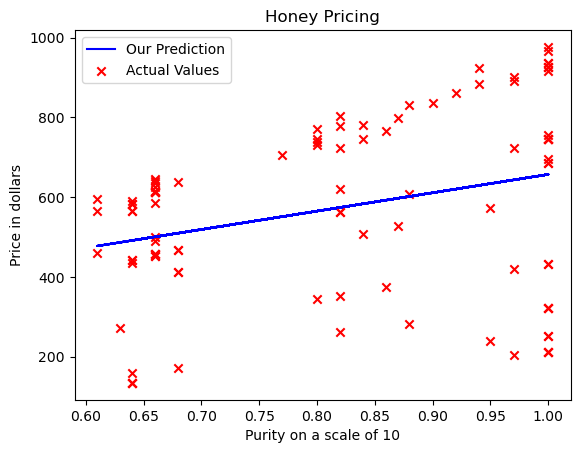

In [59]:
tmp_f_wb = compute_model_output(x_sample_train, w_final, b_final,)

# Plot our model prediction
plt.plot(x_sample_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_sample_train, y_sample_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Honey Pricing")
# Set the y-axis label
plt.ylabel('Price in dollars')
# Set the x-axis label
plt.xlabel('Purity on a scale of 10')
plt.legend()
plt.show()

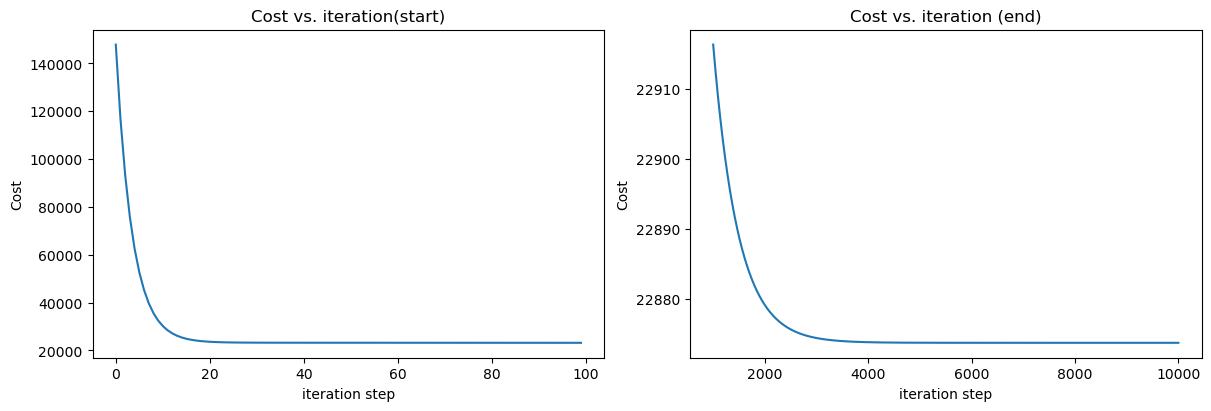

In [60]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

## Evaluation

It can be seen that the cost decreases rapidly at first and as the iteration proceeds, the cost seems to converge at a value around 22900. Hence this suggests that the squared error term used in the cost function, along with the gradient descent method seems to have worked in finding the best parameters w and b that minimizes the cost function. However, the choice of the number of iterations as well as the learning rate is crucial and can effect the accuracy of the outcome. Therefore, we will have to implement some methodology that will make sure a reasonable choice of the learning rate and the number of iterations will be used. 

Moreover, only 100 randomly chosen samples were chosen to carry out linear regression on. Perhaps it will increase the accuracy of the linear regression of the parameters w and b, were found in a few set of data samples and use the average of them. 

## Multivariate linear regression on the price of honey

Firstly, we will have to manipulate the data and store them in two different arrays. 
- Matrix X with m training examples, n features (m,n)
- Matrix Y with desired outcomes(prices)

For the purposes of the investigation, we will use features CS(Color score), Density, and Viscosity. 

In [8]:
mult_x_sample_train = sampled_data[["CS", "Density", "Viscosity"]].to_numpy()
mult_y_sample_train = sampled_data["Price"].to_numpy()

In [15]:
#X array with 100 samples, 3 features
print(f"X shape: {mult_x_sample_train.shape}")
#Y array with 100 samples, 1 feature(price)
print(f"Y shape: {mult_y_sample_train.shape}")

X shape: (100, 3)
Y shape: (100,)


The previous function of 
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$
can now be represented as a dot product of two vectors x and w 
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b $$ 


The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 $$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  $$ 

In [18]:
def compute_cost_mult(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align}
$$

In [19]:
def compute_gradient_mult(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [20]:
def gradient_descent_mult(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

testing the implementation: 

In [30]:
# initialize parameters
initial_w = np.zeros(mult_x_sample_train.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 1.0e-8
# run gradient descent 
w_final, b_final, J_hist = gradient_descent_mult(mult_x_sample_train, mult_y_sample_train, initial_w, initial_b,
                                                    compute_cost_mult, compute_gradient_mult, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = mult_x_sample_train.shape
print(mult_x_sample_train.shape)
for i in range(m):
    print(f"prediction: {np.dot(mult_x_sample_train[i], w_final) + b_final:0.2f}, target value: {mult_y_sample_train[i]}")

Iteration    0: Cost 117124.50   
Iteration  100: Cost 52047.83   
Iteration  200: Cost 52047.57   
Iteration  300: Cost 52047.30   
Iteration  400: Cost 52047.04   
Iteration  500: Cost 52046.78   
Iteration  600: Cost 52046.52   
Iteration  700: Cost 52046.26   
Iteration  800: Cost 52046.00   
Iteration  900: Cost 52045.73   
b,w found by gradient descent: 0.00,[0.00490562 0.00139065 0.09378727] 
(100, 3)
prediction: 509.34, target value: 926.3
prediction: 440.41, target value: 134.43
prediction: 454.15, target value: 321.85
prediction: 634.09, target value: 286.27
prediction: 620.62, target value: 355.54
prediction: 388.46, target value: 411.67
prediction: 542.11, target value: 966.61
prediction: 194.64, target value: 754.98
prediction: 224.96, target value: 721.93
prediction: 441.88, target value: 754.16
prediction: 572.92, target value: 976.69
prediction: 709.46, target value: 738.09
prediction: 405.34, target value: 684.45
prediction: 246.64, target value: 489.2
prediction: 259.

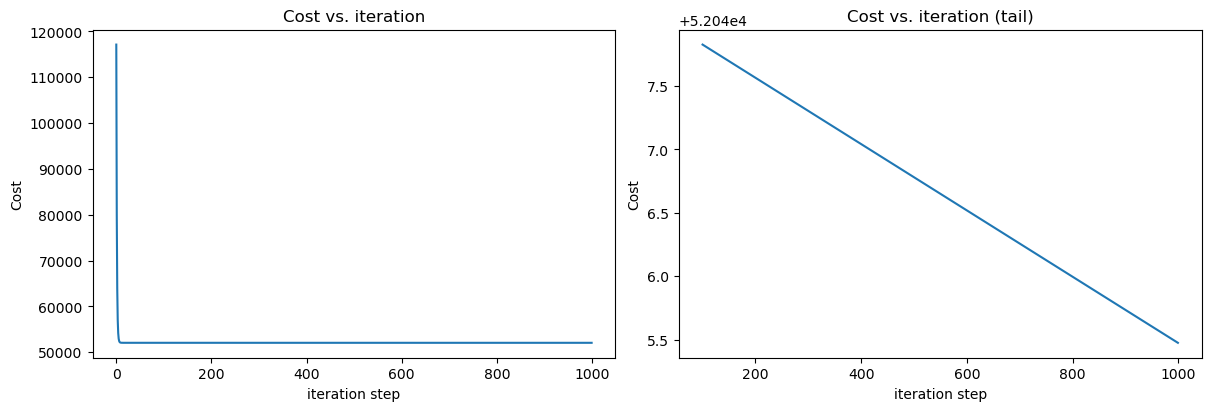

In [31]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

Here, the result is seems to be not capable of predicting accurately, and the cost is still decreasing after 1000 iterations. Doing the feature scaling and choosing an appropriate value for the learning rate may help.

In [32]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [33]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(mult_x_sample_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(mult_x_sample_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [5.20800e+00 1.53800e+00 5.32814e+03], 
X_sigma = [2.51651664e+00 1.71108153e-01 2.51970598e+03]
Peak to Peak range by column in Raw        X:[8.91000e+00 6.30000e-01 8.36278e+03]
Peak to Peak range by column in Normalized X:[3.54060842 3.68188183 3.31895073]


In [47]:
# initialize parameters
initial_w = np.zeros(mult_x_sample_train.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 1.0e-1
# run gradient descent 
w_norm, b_norm, hist = gradient_descent_mult(X_norm, mult_y_sample_train, initial_w, initial_b,
                                                    compute_cost_mult, compute_gradient_mult, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_norm.shape
print(X_norm.shape)
for i in range(m):
    print(f"prediction: {np.dot(X_norm[i], w_norm) + b_norm:0.2f}, target value: {mult_y_sample_train[i]}")

Iteration    0: Cost 170739.94   
Iteration  100: Cost 25008.32   
Iteration  200: Cost 25008.32   
Iteration  300: Cost 25008.32   
Iteration  400: Cost 25008.32   
Iteration  500: Cost 25008.32   
Iteration  600: Cost 25008.32   
Iteration  700: Cost 25008.32   
Iteration  800: Cost 25008.32   
Iteration  900: Cost 25008.32   
b,w found by gradient descent: 0.01,[-0.00016472 -0.00038088  0.00030935] 
(100, 3)
prediction: 650.12, target value: 926.3
prediction: 530.32, target value: 134.43
prediction: 583.85, target value: 321.85
prediction: 646.94, target value: 286.27
prediction: 564.57, target value: 355.54
prediction: 585.95, target value: 411.67
prediction: 712.78, target value: 966.61
prediction: 572.56, target value: 754.98
prediction: 596.65, target value: 721.93
prediction: 601.37, target value: 754.16
prediction: 667.21, target value: 976.69
prediction: 609.82, target value: 738.09
prediction: 606.71, target value: 684.45
prediction: 539.84, target value: 489.2
prediction: 5

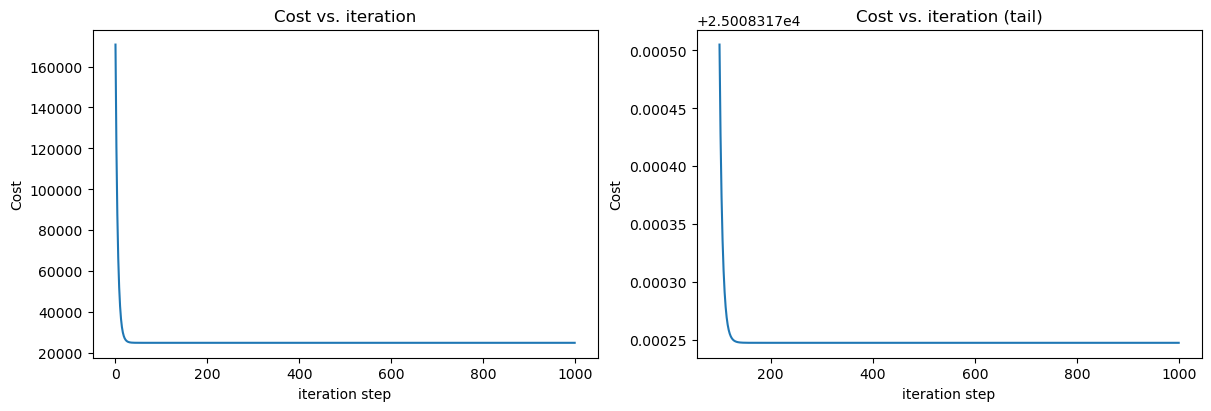

In [48]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(hist)
ax2.plot(100 + np.arange(len(hist[100:])), hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

However, it can be seen that the predictions are not very accurate.

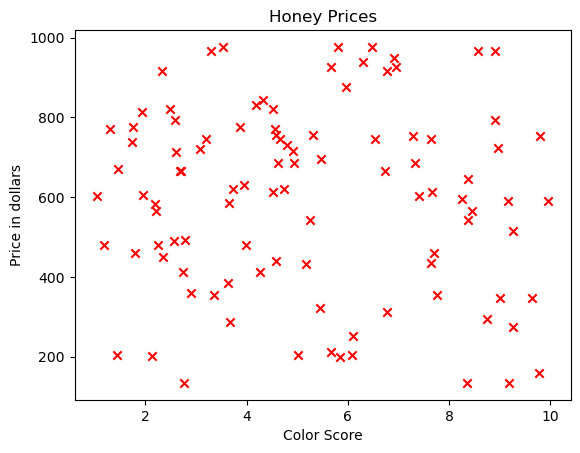

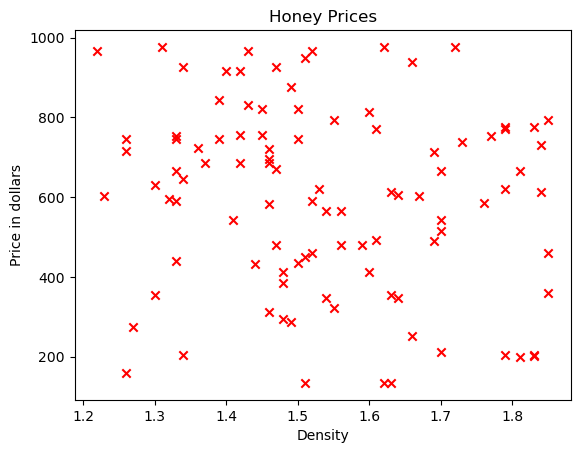

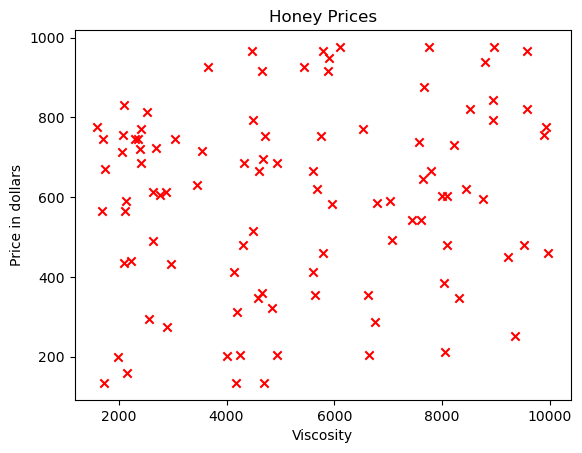

In [61]:
# Plot the sampled data points
plt.scatter(mult_x_sample_train[:, 0], mult_y_sample_train, marker='x', c='r')
# Set the title
plt.title("Honey Prices")
# Set the y-axis label
plt.ylabel('Price in dollars')
# Set the x-axis label
plt.xlabel('Color Score')
plt.show()

# Plot the sampled data points
plt.scatter(mult_x_sample_train[:, 1], mult_y_sample_train, marker='x', c='r')
# Set the title
plt.title("Honey Prices")
# Set the y-axis label
plt.ylabel('Price in dollars')
# Set the x-axis label
plt.xlabel('Density')
plt.show()

# Plot the sampled data points
plt.scatter(mult_x_sample_train[:, 2], mult_y_sample_train, marker='x', c='r')
# Set the title
plt.title("Honey Prices")
# Set the y-axis label
plt.ylabel('Price in dollars')
# Set the x-axis label
plt.xlabel('Viscosity')
##plt.show()

## Evaluation

It can be seen that the features don't show a linear relationship in fact, they don't seem to show any sort of meaningful correlation. This may explain why fitting a linear regression on the data does not product an outcome that predicts the outcome very accurately. 